# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NY-Mahattan  (Clustering)

In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Import the data as Pandas DataFrame as follows
df = pd.read_csv("df_man_zip_law.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FELONY       55 non-null     int64  
 1   MISDEMEANOR  55 non-null     int64  
 2   VIOLATION    55 non-null     int64  
 3   Crime        55 non-null     int64  
 4   zip          55 non-null     int64  
 5   latitude     55 non-null     float64
 6   longitude    55 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 3.1 KB


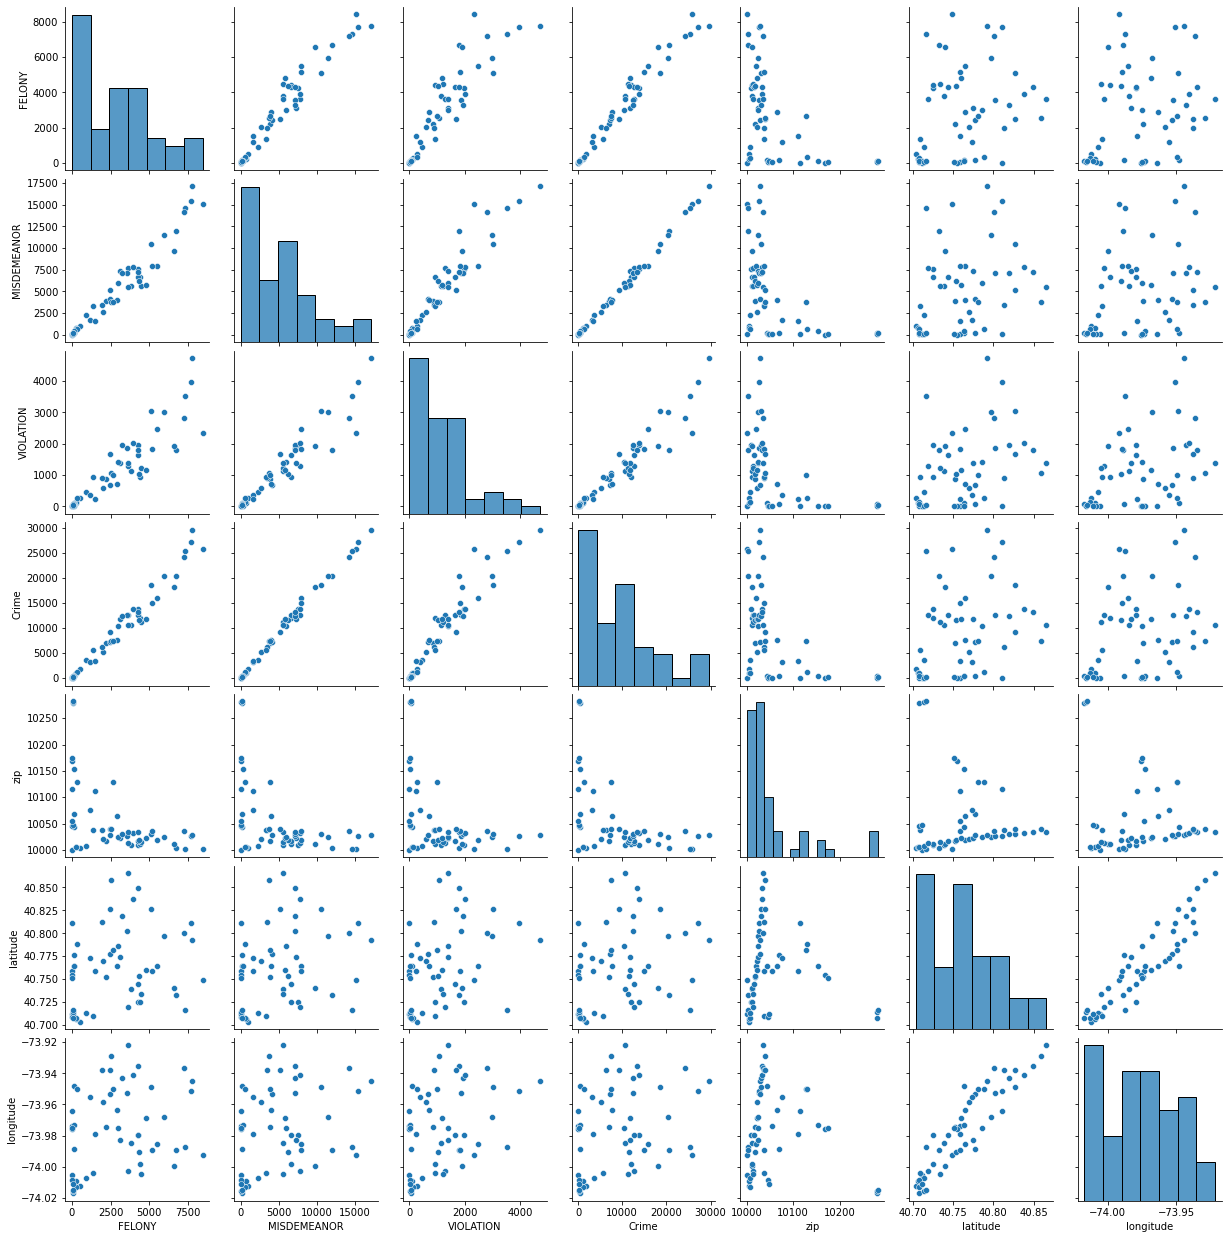

In [3]:
sns.pairplot(df)

## 1. K-Means

- Drop zip code column

In [4]:
df2 = df.copy()
df2.drop('zip', axis=1, inplace=True)
df2.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
0,12,21,6,39,40.712177,-74.005564
1,8432,15070,2338,25840,40.749185,-73.992193
2,7293,14630,3532,25455,40.716748,-73.987393
3,6705,11991,1785,20481,40.732359,-73.989222
4,526,1000,267,1793,40.703835,-74.012490


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(df2)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled) for k in range(2, 7)]
inertias = [model.inertia_ for model in kmeans_per_k]

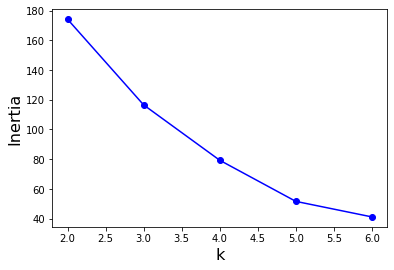

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), inertias, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.show()

- Hinge at k = 5

In [7]:
# Computation of silhouette sores
silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in kmeans_per_k]

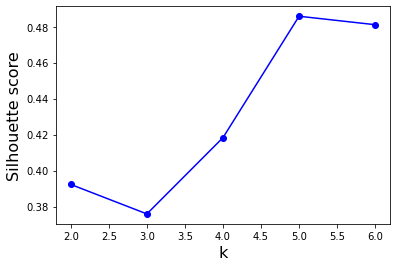

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Silhouette score", fontsize=16)
plt.show()

- Silhouette score is the best at k = 5

## 5-cluster result

In [9]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [10]:
kmeans_5.cluster_centers_

array([[-0.74438344, -0.7652943 , -0.7578711 , -0.76735144,  0.14987532,
         0.38523298],
       [ 1.69946821,  1.94246716,  1.96615829,  1.89573036,  0.50659144,
         0.54702487],
       [ 0.68616354,  0.48379306,  0.31043754,  0.52758911, -0.38271336,
        -0.46731417],
       [-1.03462194, -0.93500815, -0.88450367, -0.96992702, -1.2462435 ,
        -1.34451343],
       [ 0.13050325,  0.17426641,  0.37354667,  0.1903886 ,  1.65904944,
         1.46554714]])

In [11]:
cols = list(df2)  # make column name list
cols

['FELONY', 'MISDEMEANOR', 'VIOLATION', 'Crime', 'latitude', 'longitude']

In [12]:
# Scatter plot of 5-cluster result
# X_scaled: scaled X variables
# yr: cluster labels
# column name of X variables
# x: x-label to plot
# y: y-label to plot
def plot_5c(X_s, yr, cols, x, y):
    nx = cols.index(x)
    ny = cols.index(y)
    plt.scatter(X_s[:,nx][yr==4], X_s[:,ny][yr==4], 
             marker='o', c = 'b', s = 60, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==3], X_s[:,ny][yr==3],
             marker='s', c = 'c', s = 50, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==2], X_s[:,ny][yr==2],
              marker='^', c = 'g', s = 70, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==1], X_s[:,ny][yr==1],
              marker='+', c = 'm', s = 90, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==0], X_s[:,ny][yr==0],
              marker='D', c = 'r', s = 50, alpha = 0.6)
    plt.xlabel(x,fontsize=14)
    plt.ylabel(y,fontsize=14)
    plt.legend(["C4","C3","C2","C1","C0"],fontsize=14)

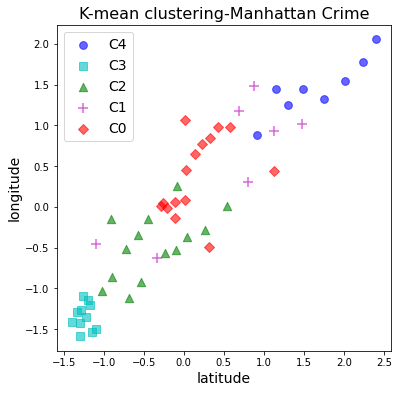

In [13]:
plt.figure(figsize=(6,6))
plot_5c(X_scaled, kmeans_5.labels_, cols, 'latitude', 'longitude')
plt.title('K-mean clustering-Manhattan Crime', fontsize = 16)
plt.show()

### 5-Cluster center

In [14]:
cols = list(df2)
kmeans_center_df = pd.DataFrame(kmeans_5.cluster_centers_, columns=cols)
kmeans_center_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
0,-0.744383,-0.765294,-0.757871,-0.767351,0.149875,0.385233
1,1.699468,1.942467,1.966158,1.895730,0.506591,0.547025
2,0.686164,0.483793,0.310438,0.527589,-0.382713,-0.467314
3,-1.034622,-0.935008,-0.884504,-0.969927,-1.246243,-1.344513
4,0.130503,0.174266,0.373547,0.190389,1.659049,1.465547


In [15]:
table1 = df2.describe()
table1[:3]

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2884.800000,5085.672727,1171.127273,9141.600000,40.763288,-73.975619
std,2485.859464,4666.730785,1118.841747,8170.692791,0.042905,0.026455


### Scaled cluster center

In [16]:
# Scaled cluster center
kmeans_center_scale_df = kmeans_center_df.copy()
for i in cols:
    kmeans_center_scale_df[i] = kmeans_center_scale_df[i]*table1[i][2]+table1[i][1]
    
kmeans_center_scale_df = kmeans_center_scale_df.astype({"FELONY":int, "MISDEMEANOR": int, "VIOLATION":int, "Crime": int})
kmeans_center_scale_df["cluster"] = kmeans_center_scale_df.index
kmeans_center_scale_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude,cluster
0,1034,1514,323,2871,40.769719,-73.965428,0
1,7109,14150,3370,24631,40.785023,-73.961148,1
2,4590,7343,1518,13452,40.746868,-73.987982,2
3,312,722,181,1216,40.709819,-74.011188,3
4,3209,5898,1589,10697,40.834469,-73.936848,4


### Scaled cluster center/mean value

In [17]:
# Scaled cluster center (normalized by mean)
table1 = df2.describe()
cols = list(df2)
kmeans_center_ratio_df = kmeans_center_scale_df.copy()
for i in cols:
    kmeans_center_ratio_df[i] = (kmeans_center_df[i]*table1[i][2]+table1[i][1])/table1[i][1]

kmeans_center_ratio_df["cluster"] = kmeans_center_scale_df.index
kmeans_center_ratio_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude,cluster
0,0.358558,0.297748,0.275964,0.314147,1.000158,0.999862,0
1,2.464448,2.782453,2.878378,2.694389,1.000533,0.999804,1
2,1.591274,1.443940,1.296578,1.471555,0.999597,1.000167,2
3,0.108456,0.142015,0.154985,0.133087,0.998688,1.000481,3
4,1.112456,1.159911,1.356870,1.170168,1.001746,0.999476,4


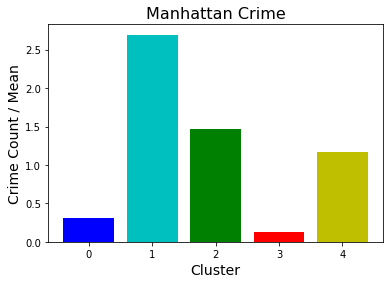

In [18]:
plt.figure(figsize=(6,4))
plt.bar(kmeans_center_ratio_df['cluster'],kmeans_center_ratio_df['Crime'],color=['b','c', 'g','r','y'])
plt.xlabel("Cluster",fontsize=14)
plt.ylabel("Crime Count / Mean",fontsize=14)
#plt.grid()
plt.title('Manhattan Crime', fontsize = 16)
plt.show()

## Append  cluster result to the dataframe

In [19]:
label = kmeans_5.labels_
df["K_mean"] = label
df.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
0,12,21,6,39,10000,40.712177,-74.005564,3
1,8432,15070,2338,25840,10001,40.749185,-73.992193,1
2,7293,14630,3532,25455,10002,40.716748,-73.987393,1
3,6705,11991,1785,20481,10003,40.732359,-73.989222,2
4,526,1000,267,1793,10004,40.703835,-74.012490,3


In [20]:
# Write to a csv file
df.to_csv("df_man_k5.csv", index = False)

### Cluster-Zip code

In [45]:
df_select = df[['zip','K_mean']]
cluster_zip_list = [] 
for cluster in range(5):
    cluster_zip_list.append(
        (cluster, list(df_select[df['K_mean']==cluster]['zip'])))
cluster_zip_dict =  dict(cluster_zip_list)

In [54]:
for cluster in range(5):
    print(cluster, cluster_zip_dict[cluster])

0 [10017, 10021, 10028, 10044, 10055, 10065, 10069, 10075, 10111, 10115, 10128, 10129, 10153, 10169, 10174]
1 [10001, 10002, 10025, 10027, 10029, 10031, 10035]
2 [10003, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 10018, 10019, 10022, 10023, 10024, 10036]
3 [10000, 10004, 10005, 10006, 10007, 10038, 10045, 10048, 10280, 10281, 10282]
4 [10026, 10030, 10032, 10033, 10034, 10037, 10039, 10040]


In [52]:
pd.DataFrame(cluster_zip_dict.items(),
            columns=['Cluster','Zip Code'])

,Cluster,Zip Code
0,0,"[10017, 10021, 10028, 10044, 10055, 10065, 100..."
1,1,"[10001, 10002, 10025, 10027, 10029, 10031, 10035]"
2,2,"[10003, 10009, 10010, 10011, 10012, 10013, 100..."
3,3,"[10000, 10004, 10005, 10006, 10007, 10038, 100..."
4,4,"[10026, 10030, 10032, 10033, 10034, 10037, 100..."
